Copyright 2020 Abhishek Dabas

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CO

# Abstract 
The field of Reinforcement Learning is very wide and has alot of advanced stuff like meta learning, transfer learning etc. Here we are trying to understand some of the most important and foundational concepts for Reinforcement Learning and implement them along with it. We will be using multiple libraries for implementing the different RL Algorithms and test those on OpenAI Gym environment

## Breakthrough in the world of Reinforcement Learning
In 2013, a company named **DeepMind**, acheievd a breakthrough in the world of Reinforcement Learning. They built a system that could learn to play many classic Atari games better than Humans.
Libraries like OpenAI gym and Keras have made it really easy to implement the DeepMind's algorithms. 

# ``Supervised`` & ``Unsupervised Learning`` & ``Reinforcement Learning``
- Supervised & Unsupervised Learning -> Learning from data 
- Reinforcement Learning -> learn from the environment

> Supervised Learning: we have the input data & the output we want. We build the model based on these 2 things

# When to Implement RL
1. No data to train on
2. we can assign a meaningful number to both positive and negatice outcomes
3. It is possible to simulate the environment 
4. Analytical solution too expensive to compute or impossible
5. More than one solution

## To implement Reinforcement learning to a problem we need to have some things:
- Define the Goal
- Know your environment
- Define a set of possible actions in this space
- Define the Rewards, which would be +ve if goal is achieved and negative for failure.
#### Note: Even when the envoronment is unknown, RL can be implemented

# Stochastic vs Deterministic Environment
A **Deterministic environment** is the one where a particular states leads to a fixed particular output state at all timesteps, whereas a **stochastic environemnt** is one where a certains state might not necessarily lead to a particular state, thus there is a probability for ending in a particular state.

# Understanding the environment with Tic-Tac-Toe

Tic-tac-toe, is one such game, which we all have played. Lets start with this example. 
- A tic-tac-toe, has 9 positions to us to take an **action**. We want the model to understand the situation and act accordingly
- Each possible combination in the game will be a different situation. The actions will be different based on these situations.
- Once we know the state, we have to choose an action(or the best action, to win the game, known as **policy**)
- Taking this action will lead us to another situation, or new state. Based on the quality of the action taken, a **reward** is given.
- Here we want to take an **action** which increases our chances to win the game, and decreases the chances of the opponent to win the game.

# Reinforcement Learning Taxonomy 
<img src="Images/taxonomy.png">

# Model Free vs Model- Based RL:
1. **Model-Free** :\
 It is an unductive approach, for solving problems. In this case model randomly performs in the environment. Then collects this data, known as experience. As this experience grows, the model gets a better idea about the rewards of an action. This approach uses past experience as empirical evidence and uses frequency statistics to estimate the value of its action.
- Rely on trial and error to update its knowledge

2. **Model-Based** :\
It is a deductive approach for solving problems. In this case we have a better understanding about the transition probabilities, and we use this model to derive the best actions and the optimal policy.
In this case, the agent can predict the dynamics of the environment as it has the estimate of the transition function. 
- They have Hard rules for the game

#### Examples:
- Algorithms that purely sample from experience such as Monte Carlo Control, SARSA, Q-learning, DQN, Actor-Critic are **model free** RL algorithms. They rely on real samples from the environment and never use generated predictions of next state and next reward to alter behaviour (although they might sample from experience memory, which is close to being a model).

- Q-Learning Algorithm:
$$Q(S_t,A_t) <- Q(S_t,A_t) + \alpha(R_t+1 + \gamma*maxQ(S_t+1,a)-Q(S_t,A_t))$$
as we see here that probablities of MDP are not used here, hence Q-learning is model-free algorithm
- Policy Improvement Algorithm
$$Q(s,a) <- P(s',r| s,a)(r+ \gamma*V(s'))$$
A probability defined by the MDP model is used here. Hence policy Iteration is Model-bases algorithm

> **Note**: If we don't have an accurate model provided as part of the problem definition, then model-free approaches are often better to use.

## On policy vs Off Policy
1. On Policy: In this, the learning agent learns the value function according to the current action derived from the policy currently being used.
1. Off Policy: In this, the learning agent learns the value function according to the action derived from another policy.

# Value Based vs Policy Based
1. In ``Policy-based`` methods we explicitly build a representation of a policy (mapping π:s→a) and keep it in memory during learning.
1. In ``Value-based`` we don't store any explicit policy, only a value function. The policy is here implicit and can be derived directly from the value function (pick the action with the best value).

# Markov Decision Process (MDP)
MDP, is one of the frameworks for solving Reinforcement Learning problems.
A Markov Decision Process contains a tuple of (S,A,R,P, $\gamma$)  :
- A set of possible world states, **S**. There can be continuous or finite states.
- A set of possible actions, **A**
- A real valued reward function **R(s,a)**. It can be positive or negative reward
- Transition Probability, **P** of ending in a state, s', after taking an action in "a", from state "s"
- $\gamma$ is the discount factor in range of (0,1)

A **Markov property** states that the probablity of being a in a state depends only on the previous state. \
In RL environment, the response at time, "t+1" is dependent only on the state and actions at time, "t" and independent of what happened in past.
$$P(S_t+1 |S_t) = P(S_t+1 | S_1,S_2,S_3...S_t)$$

## Dicount Factor
The discount Factor $\gamma$ ranges from (0,1). It tells us how much discount is to be applied for the future. It gets multiplied with every **reward**, and so we dont get the full reward. If at time step, t=1, we get a reward of +100, but the dicount factor, $\gamma = 0.9$, then actual reward would be R= 0.9*100 = 90. \
The bigger the gamma, the smaller the discount, and the more we are focused on the long term reard. In similar way, the shorter the gamma, the bigger the discount, and the more we are focused on short term rewards. 
> Note: It is difficult to choose the perfect discount rate. Too low of it, will lead out agent to put itself in long term difficulty, because of immediate small rewards. If we keep it too high, it will be difficult for our algorithm to converge because so much of future needs are to be taken into account.

## Problem with MDP
We often do not have the MDP's and hence we cannot find the optimal policy from MDP. In most of the cases MDP's are unknown. 
> How to find the policy without MDP's?
In absence of the MDP's the agent needs to interact with the environment and observe the responses from the environment. Over the time the agent understands the environment and this can start estimating the optimal policy. 

# There are 2 methods:
1. Value Iteration:
Learn the values for all states, then we can act according to the gradient. Value iteration learns the value of the states from the Bellman Update directly. The Bellman Update is guaranteed to converge to optimal values, under some non-restrictive conditions. 
2. Policy Iteration : Learn a policy in tandem to the values. Policy learning incrementally looks at the current values and extracts a policy. Because the action space is finite, the hope is that it can converge faster than Value Iteration. Conceptually, the last change to the actions will happen well before the small rolling-average updates end. There are two steps to Policy Iteration.

## Policy
It is the **strategy** which decides the behavious of the agent. It specifies which actions to take in a particular state.It is denoted by $\pi$. \
It is a function, when given a current state in environment, it outputs and action, or a probability distribution over actions (if the policy is stochatic) to execute. The **optimal Policy** is the one which, if followed will make the agent collect the largest amount of rewards in the longer run. Thus we always want to find these optimal policy or policies.
- In MDP's there is always an **optimal deterministic polucy** that is better than any other policy, even if the MDP is non deterministic

## Value Iteration:
We assign a value, V(s) to a state, s which can be used to determine the optimal policies. 

# Exploration and exploitation Tradeoff
Exploration means the agent acts randomly, and exploitation means it uses its Q-values to choose what it believes to be the optimal action. Rather than trying to find new and better opportunities, you settle with the best one you’ve found in your past experiences and maximize your utility from there

In [ ]:
# E-Greedy 

def epsilon_greedy(probabilities,epsilon):
  random_number = np.random.rand()
  if random_number < epsilon:
    max_value = probabilities.shape[0]
    return np.random.randint(0,max_value)
  else:
    return np.argmax(probabilities)

## Credit Assignment Problem

## Monte Carlo Tree search:
- It is an algorithm that figures out the best move out of a set of moves by Selecting → Expanding → Simulating → Updating the nodes in tree to find the final solution. This method is repeated until it reaches the solution and learns the policy of the game.
- It is one of the method to predict the path that should be taken by the policy to reach a final solution. Since the moves in games increases exponentially, the computation powerrequired to calculate also increases.
- Faster Tree search can be achieved by making a policy and giving more importance to some nodes than others.
- We use Reinforcement Learning to make random decisions in the game further down from every children node. Then, reward is given to every children node — by calculating how close the output of their random decision was from the final output that we need to win the game.

<img src="Images/MC.jpeg">

# Understanding Reinforcement Learning
## Trying Random Actions in a game

In [6]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

render_in_jp = lambda : plt.imshow(env.render(mode='rgb_array'))

C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

In [7]:
env = gym.make("FrozenLake-v0")

In [8]:
# to start the environment lets reset it
env.reset()
print("starting the environment")

# lets visualize the environment by calling the render funtction
env.render()

starting the environment

SFFF
FHFH
FFFH
HFFG


In [9]:
# lets take an action
env.step(1)
print("take the step 1")
env.render()

take the step 1
  (Down)
SFFF
FHFH
FFFH
HFFG


In [10]:
!pip install "gym[atari]"

In [8]:
# playing with a set of envvironments

gym_env = ["MountainCarContinuous-v0","Acrobot-v1"]

env = gym.make(gym_env[0])

observation = env.reset()

for x in range(1000):
    
    env.render()
    
    print(observation)
    
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    
    print(observation, reward, done, info)
    
    if done:
        print("the job is done in {} timesteps".format(x+1))
        break

[-0.58484419  0.        ]
[-5.84788218e-01  5.59669001e-05] -0.007139354295304656 False {}
[-5.84788218e-01  5.59669001e-05]
[-5.85215395e-01 -4.27176702e-04] -0.03922862302697503 False {}
[-5.85215395e-01 -4.27176702e-04]
[-0.58628652 -0.00107113] -0.054115663524329706 False {}
[-0.58628652 -0.00107113]
[-5.86813828e-01 -5.27302797e-04] -0.00025965924880912985 False {}
[-5.86813828e-01 -5.27302797e-04]
[-5.86905802e-01 -9.19744690e-05] -5.743286880036981e-05 False {}
[-5.86905802e-01 -9.19744690e-05]
[-0.58537373  0.00153207] -0.058991886270065665 False {}
[-0.58537373  0.00153207]
[-0.58356683  0.0018069 ] -0.0015348221984998968 False {}
[-0.58356683  0.0018069 ]
[-0.58212238  0.00144445] -0.02914533998732374 False {}
[-0.58212238  0.00144445]
[-5.81588576e-01  5.33803744e-04] -0.08067847179447654 False {}
[-5.81588576e-01  5.33803744e-04]
[-0.580336    0.00125257] -0.0036362719994633475 False {}
[-0.580336    0.00125257]
[-0.57870739  0.00162861] -0.00010001480952566283 False {}
[-0

[-0.45725988  0.00307123]
[-0.45534719  0.0019127 ] -0.019611157685380933 False {}
[-0.45534719  0.0019127 ]
[-0.45298661  0.00236058] -0.040636010658596435 False {}
[-0.45298661  0.00236058]
[-0.45001692  0.00296969] -0.057229207829381325 False {}
[-0.45001692  0.00296969]
[-0.44653207  0.00348486] -0.05017942637497441 False {}
[-0.44653207  0.00348486]
[-0.44254911  0.00398296] -0.050976295668169774 False {}
[-0.44254911  0.00398296]
[-0.44007782  0.0024713 ] -0.036785052815707785 False {}
[-0.44007782  0.0024713 ]
[-0.43860913  0.00146869] -0.006510405734196922 False {}
[-0.43860913  0.00146869]
[-4.38925397e-01 -3.16269468e-04] -0.059230522140518715 False {}
[-4.38925397e-01 -3.16269468e-04]
[-0.44051212 -0.00158672] -0.018330262150360356 False {}
[-0.44051212 -0.00158672]
[-0.44334123 -0.00282911] -0.01739849504816995 False {}
[-0.44334123 -0.00282911]
[-0.44533131 -0.00199008] -0.09154185331129981 False {}
[-0.44533131 -0.00199008]
[-0.44717385 -0.00184254] -0.023630290487795948 

[-4.50575038e-01 -2.40435299e-04]
[-4.50124992e-01  4.50045489e-04] -0.06765485924193514 False {}
[-4.50124992e-01  4.50045489e-04]
[-0.44890143  0.00122356] -0.0774535218991165 False {}
[-0.44890143  0.00122356]
[-0.44677774  0.0021237 ] -0.09417960776851296 False {}
[-0.44677774  0.0021237 ]
[-0.44389876  0.00287898] -0.07818664134341057 False {}
[-0.44389876  0.00287898]
[-0.44228318  0.00161558] -0.020029924077427097 False {}
[-0.44228318  0.00161558]
[-0.44082768  0.0014555 ] -0.008751878116441958 False {}
[-0.44082768  0.0014555 ]
[-4.41092423e-01 -2.64746377e-04] -0.05434865456169433 False {}
[-4.41092423e-01 -2.64746377e-04]
[-4.40668337e-01  4.24086356e-04] -0.07526501653048322 False {}
[-4.40668337e-01  4.24086356e-04]
[-4.40452658e-01  2.15678985e-04] -0.007368485064083163 False {}
[-4.40452658e-01  2.15678985e-04]
[-0.44121775 -0.00076509] -0.005876425005259401 False {}
[-0.44121775 -0.00076509]
[-0.44217287 -0.00095512] -0.007898114365190523 False {}
[-0.44217287 -0.000955

[-0.49083238 -0.00489709] -0.00812942530482994 False {}
[-0.49083238 -0.00489709]
[-0.49624552 -0.00541313] -0.0032564700502186964 False {}
[-0.49624552 -0.00541313]
[-0.50080847 -0.00456296] -0.049476621576936 False {}
[-0.50080847 -0.00456296]
[-0.50650754 -0.00569907] -0.041415013091299004 False {}
[-0.50650754 -0.00569907]
[-0.51217469 -0.00566715] -0.0011384276957644214 False {}
[-0.51217469 -0.00566715]
[-0.51726901 -0.00509431] -0.019272116620925674 False {}
[-0.51726901 -0.00509431]
[-0.52152458 -0.00425558] -0.03490525835177891 False {}
[-0.52152458 -0.00425558]
[-0.52480042 -0.00327583] -0.044027458159065704 False {}
[-0.52480042 -0.00327583]
[-0.52814438 -0.00334396] -0.0002644731656080757 False {}
[-0.52814438 -0.00334396]
[-0.53104786 -0.00290348] -0.007340067068685486 False {}
[-0.53104786 -0.00290348]
[-0.53486114 -0.00381328] -0.041444101437042496 False {}
[-0.53486114 -0.00381328]
[-0.53754721 -0.00268608] -0.04832531871576898 False {}
[-0.53754721 -0.00268608]
[-0.540

[-0.48687069  0.00499596]
[-0.48360145  0.00326924] -0.09367858305429913 False {}
[-0.48360145  0.00326924]
[-0.48040807  0.00319338] -0.0022181808840927354 False {}
[-0.48040807  0.00319338]
[-0.47691909  0.00348899] -0.017008871152762596 False {}
[-0.47691909  0.00348899]
[-0.47525731  0.00166178] -0.09712150234838966 False {}
[-0.47525731  0.00166178]
[-0.4730707   0.00218661] -0.03489883546322403 False {}
[-0.4730707   0.00218661]
[-0.47002162  0.00304908] -0.06833516409088247 False {}
[-0.47002162  0.00304908]
[-0.46792519  0.00209642] -0.013569634457376002 False {}
[-0.46792519  0.00209642]
[-0.4651193  0.0028059] -0.05625857445488727 False {}
[-0.4651193  0.0028059]
[-0.46307509  0.00204421] -0.004704238056886668 False {}
[-0.46307509  0.00204421]
[-0.46181889  0.0012562 ] -0.005034757534088663 False {}
[-0.46181889  0.0012562 ]
[-0.46076734  0.00105155] -0.002914013786298164 False {}
[-0.46076734  0.00105155]
[-0.45968276  0.00108458] -0.011176707848762036 False {}
[-0.45968276

[-0.54249122  0.0035716 ]
[-0.53872976  0.00376146] -0.0001034447169370234 False {}
[-0.53872976  0.00376146]
[-0.53439438  0.00433538] -0.009423908928557358 False {}
[-0.53439438  0.00433538]
[-0.53040037  0.003994  ] -0.007927246112971265 False {}
[-0.53040037  0.003994  ]
[-0.52737666  0.00302371] -0.046358516969009146 False {}
[-0.52737666  0.00302371]
[-0.52540071  0.00197595] -0.051465089334675446 False {}
[-0.52540071  0.00197595]
[-0.52276942  0.00263129] -0.018308457509626043 False {}
[-0.52276942  0.00263129]
[-0.52052878  0.00224064] -0.006568530686638852 False {}
[-0.52052878  0.00224064]
[-0.51703549  0.0034933 ] -0.07232779414304993 False {}
[-0.51703549  0.0034933 ]
[-0.5125211   0.00451438] -0.05091385061178677 False {}
[-0.5125211   0.00451438]
[-0.50796203  0.00455907] -0.0007254002644670132 False {}
[-0.50796203  0.00455907]
[-0.5043086   0.00365343] -0.027626032682042025 False {}
[-0.5043086   0.00365343]
[-0.50057332  0.00373528] -0.002278904707864715 False {}
[-0.

[-0.43569142 -0.00527354]
[-0.44230271 -0.00661128] -0.020918531145327626 False {}
[-0.44230271 -0.00661128]
[-0.44804699 -0.00574428] -0.09613088011079221 False {}
[-0.44804699 -0.00574428]
[-0.45564539 -0.0075984 ] -0.07422678432932095 False {}
[-0.45564539 -0.0075984 ]
[-0.46239601 -0.00675062] -0.08146957808946845 False {}
[-0.46239601 -0.00675062]
[-0.46862946 -0.00623344] -0.04213120144779623 False {}
[-0.46862946 -0.00623344]
[-0.47673085 -0.0081014 ] -0.09442023046783597 False {}
[-0.47673085 -0.0081014 ]
[-0.48418396 -0.00745311] -0.04432393677396682 False {}
[-0.48418396 -0.00745311]
[-0.49080333 -0.00661937] -0.056616161160150114 False {}
[-0.49080333 -0.00661937]
[-0.49897629 -0.00817296] -0.07604014271933579 False {}
[-0.49897629 -0.00817296]
[-0.50815394 -0.00917766] -0.02989884338422968 False {}
[-0.50815394 -0.00917766]
[-0.51634252 -0.00818857] -0.05425575809973147 False {}
[-0.51634252 -0.00818857]
[-0.52570509 -0.00936257] -0.05570935610123798 False {}
[-0.52570509 -

[-0.59818688  0.00742573]
[-0.59127424  0.00691263] -0.050680406511617454 False {}
[-0.59127424  0.00691263]
[-0.5825081   0.00876615] -0.0809313135385569 False {}
[-0.5825081   0.00876615]
[-0.57397846  0.00852964] -0.020312077878305336 False {}
[-0.57397846  0.00852964]
[-0.56584338  0.00813508] -0.026417222491730643 False {}
[-0.56584338  0.00813508]
[-0.55644709  0.00939629] -0.03970879210651788 False {}
[-0.55644709  0.00939629]
[-0.54792737  0.00851972] -0.05600344495456433 False {}
[-0.54792737  0.00851972]
[-0.5400269   0.00790046] -0.02855586281453384 False {}
[-0.5400269   0.00790046]
[-0.53235194  0.00767497] -0.005402714585314161 False {}
[-0.53235194  0.00767497]
[-0.52549417  0.00685777] -0.03464024351617354 False {}
[-0.52549417  0.00685777]
[-0.5179618   0.00753237] -0.019382920264374184 False {}
[-0.5179618   0.00753237]
[-0.50954096  0.00842083] -0.03850083019692399 False {}
[-0.50954096  0.00842083]
[-0.50151743  0.00802354] -0.003786773370902297 False {}
[-0.5015174

[-0.49601585 -0.00383696]
[-0.49859308 -0.00257723] -0.0955655685509246 False {}
[-0.49859308 -0.00257723]
[-0.50170926 -0.00311618] -0.005493774561409115 False {}
[-0.50170926 -0.00311618]
[-0.50632226 -0.004613  ] -0.07894561434636814 False {}
[-0.50632226 -0.004613  ]
[-0.51131997 -0.00499772] -0.0028945393050509916 False {}
[-0.51131997 -0.00499772]
[-0.51621114 -0.00489116] -0.0017533956269295326 False {}
[-0.51621114 -0.00489116]
[-0.52071222 -0.00450108] -0.008820448051853535 False {}
[-0.52071222 -0.00450108]
[-0.52627248 -0.00556027] -0.04784399593477815 False {}
[-0.52627248 -0.00556027]
[-0.53273648 -0.006464  ] -0.03792811722414627 False {}
[-0.53273648 -0.006464  ]
[-0.538572   -0.00583552] -0.013935855355329353 False {}
[-0.538572   -0.00583552]
[-0.54434694 -0.00577494] -0.00011874382450383636 False {}
[-0.54434694 -0.00577494]
[-0.54959973 -0.00525279] -0.005974608589002984 False {}
[-0.54959973 -0.00525279]
[-0.55523776 -0.00563803] -0.014953716994547596 False {}
[-0.5

[-0.59089508  0.00197112]
[-0.58885666  0.00203842] -0.008371385264673847 False {}
[-0.58885666  0.00203842]
[-0.58733428  0.00152238] -0.04465405696195468 False {}
[-0.58733428  0.00152238]
[-0.58656351  0.00077077] -0.06688167041109275 False {}
[-0.58656351  0.00077077]
[-0.58587595  0.00068756] -0.013574056867595719 False {}
[-0.58587595  0.00068756]
[-0.58470116  0.00117479] -2.322951174572258e-05 False {}
[-0.58470116  0.00117479]
[-0.58265458  0.00204658] -0.00769468341920323 False {}
[-0.58265458  0.00204658]
[-0.58012805  0.00252653] -6.880454371417968e-05 False {}
[-0.58012805  0.00252653]
[-0.577835    0.00229305] -0.01909239986645881 False {}
[-0.577835    0.00229305]
[-0.57545784  0.00237716] -0.004575841823060345 False {}
[-0.57545784  0.00237716]
[-0.57262147  0.00283637] -0.0002293529889208834 False {}
[-0.57262147  0.00283637]
[-0.56889125  0.00373021] -0.0123666965752677 False {}
[-0.56889125  0.00373021]
[-0.56454334  0.00434791] -0.0034608536023683634 False {}
[-0.56

# Q-Learning
**What’s this ‘Q’?** The ‘Q’ in Q-learning stands for ``Quality``. Quality here represents how useful a given action is in gaining some future reward.\
- Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take, given the current state. It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed. More specifically, Q-learning seeks to learn a policy that maximizes the total reward.
- The function Q(s,a) gives the discounted total value of taking an action, **a** in a state, **s**. It is esentially the reward for taking an action, in a state, in addition to the discounted value of the states where we would end up in. 
$$Q(s,a) = r + \gamma* max_a(Q(s',a'))$$
In case of Non-Deterministic environment, where we end up in a different state each time we take an action, a in state s. In such case we take an *average* of the equation.
> Note: Knowing this optimal Q function gives us the optimal policy.
ex. $$\pi= argmax_a(Q(s,a)$$
here, $\pi$ is the policy at state s



In [14]:
# Imports 

import gym
import numpy as np
import random
random.seed(0)
np.random.seed(0)

In [40]:
# Hypteparameters

num_episodes = 4000
discount_factor = 0.99 # gamma
learning_rate = 0.8

env = gym.make('FrozenLake-v0') 

In [28]:
report = '100-ep Average: %.2f . Best 100-ep Average: %.2f . Average: %.2f ' \
         '(Episode %d)'

def evaluation_report(rewards, episode):
    """Print rewards report for current episode
    - Average for last 100 episodes
    - Best 100-episode average across all time
    - Average for all episodes across time
    """
    print(report % (
        np.mean(rewards[-100:]),
        max([np.mean(rewards[i:i+100]) for i in range(len(rewards) - 100)]),
        np.mean(rewards),
        episode))


- ``env.render`` : start the bot using this 
- The ``Step`` function returns 4 values:
1. Observation_n : observation of the environment
1. reward_n : If the action was beneficial or not (+1/-1)
1. done_n : This indicates the game is over or not (yes/no)
1. Info : Additional information such as performance and latency for debugging purposes

In [42]:
# create a Q table 
Q = np.zeros((env.observation_space.n, env.action_space.n))
rewards= []
report_interval= 500

for episode in range(1,num_episodes+1):

    #store the initial state
    state = env.reset()
    episode_reward = 0

    ## run infinitely
    
    while True:

        ## the noise is helpful for the agent to learn and explore the environment on its own and not depend on the environemnt
        ## Noise, or meaningless, random data, is sometimes introduced when training deep neural networks because it can improve both the performance and the accuracy of the mode
        ## the higher the noise, the less the values in noise
        noise = np.random.random((1,env.action_space.n))/(episode**2)
        action = np.argmax(Q[state,:] + noise)

        action = env.action_space.sample()

        # to update the  Q function we need current and next state
        next_state, reward,done, _ = env.step(action)

        # q-table update
        learned_value = reward + discount_factor * np.max(Q[next_state,:])
        old_value = Q[state, action]

        new_value = (1- learning_rate) * old_value + learning_rate * learned_value
        Q[state,action] = new_value

        episode_reward += reward
        state = next_state

        if done:
            rewards.append(episode_reward)
            
            if episode % report_interval == 0:
                evaluation_report(rewards, episode)
            
            break

100-ep Average: 0.00 . Best 100-ep Average: 0.03 . Average: 0.01 (Episode 500)
100-ep Average: 0.01 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 1000)
100-ep Average: 0.01 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 1500)
100-ep Average: 0.00 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 2000)
100-ep Average: 0.00 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 2500)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 3000)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 3500)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.01 (Episode 4000)


According to the Gym FrozenLake page, “solving” the game means attaining a 100-episode average of 0.78. Informally, “solving” means “plays the game very well”. While not in record time, the Q-table agent is able to solve FrozenLake in 4000 episodes.

## E-Greedy
we will create an environment that will update this q-table as the agent explored th environment over thousands of time steps


In [49]:
# Hypteparameters
discount_factor = 0.99 # gamma
learning_rate = 0.15  # alpha
epsilon = 0.2 # epsilon greedy

num_episodes = 10000
rewards= []

# environment
env = gym.make('FrozenLake-v0') 

In [50]:
import random
from IPython.display import clear_output

rewards_2=[]
report_interval=500

# Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

for episode in range(1,num_episodes):
    state= env.reset()

    done=False
    episode_reward = 0
    
    while not done:

        # epsilon greedy
        if random.uniform(0,1) > epsilon:
            # explore
            action = env.action_space.sample()
        else:
            # exploit 
            action = np.argmax(Q[state])

        # to update the  Q function we need current and next state
        next_state, reward,done, _ = env.step(action)

        # Q-Table
        learned_value = reward + discount_factor * np.max(Q[next_state,:])
        old_value = Q[state, action]

        new_value = (1- learning_rate) * old_value + learning_rate * learned_value
        Q[state,action] = new_value

        episode_reward += reward
        state = next_state

        if done:
            print(episode_reward)
            rewards_2.append(episode_reward)
            if episode % report_interval == 0:
                evaluation_report(rewards_2, episode)
            break

print("training finished")

100-ep Average: 0.02 . Best 100-ep Average: 0.04 . Average: 0.02 (Episode 500)
100-ep Average: 0.02 . Best 100-ep Average: 0.04 . Average: 0.02 (Episode 1000)
100-ep Average: 0.03 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 1500)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 2000)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 2500)
100-ep Average: 0.04 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 3000)
100-ep Average: 0.03 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 3500)
100-ep Average: 0.03 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 4000)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 4500)
100-ep Average: 0.02 . Best 100-ep Average: 0.06 . Average: 0.02 (Episode 5000)
100-ep Average: 0.00 . Best 100-ep Average: 0.08 . Average: 0.02 (Episode 5500)
100-ep Average: 0.04 . Best 100-ep Average: 0.08 . Average: 0.03 (Episode 6000)
100-ep Average: 0.02 . Best 100-ep Averag

In [51]:
Q

array([[0.57975221, 0.5556057 , 0.55691366, 0.5616018 ],
       [0.38836888, 0.35933167, 0.38740491, 0.53999019],
       [0.45602463, 0.47016816, 0.44208405, 0.5032424 ],
       [0.40277793, 0.38311776, 0.28715552, 0.48390379],
       [0.58557275, 0.43893868, 0.43753297, 0.35788475],
       [0.        , 0.        , 0.        , 0.        ],
       [0.43002988, 0.13132104, 0.27239844, 0.10070234],
       [0.        , 0.        , 0.        , 0.        ],
       [0.46513057, 0.42824311, 0.38199882, 0.61797044],
       [0.45218045, 0.65717745, 0.51798822, 0.30927679],
       [0.54843465, 0.65730658, 0.52887253, 0.35821777],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.55283098, 0.49317685, 0.75661592, 0.62320627],
       [0.73390385, 0.88905037, 0.80956157, 0.83083266],
       [0.        , 0.        , 0.        , 0.        ]])

In [52]:
Q[9]

array([0.45218045, 0.65717745, 0.51798822, 0.30927679])

+ The Q-table has been established over 10000 number of episodes

In [53]:
Q[3]

array([0.40277793, 0.38311776, 0.28715552, 0.48390379])

> Max q-value here is "0.25", which means it takes action F at this point form the list of actions: Safe (S), Frozen (F), Hole (H) and Goal (G)

In [72]:
# evaluate the q-table built

report_interval= 500
num_episodes = 10000
total_penalties = 0
total_epochs = 0
rewards_3 = []

for episode in range(1,num_episodes):
    state = env.reset()
    done = False
    reward,penalties,epochs = 0,0,0
    episode_reward = 0
    
    while not done:
        action = np.argmax(Q[state])
        state,reward, done, info = env.step(action)
        episode_reward += reward
        
        if done:

            rewards_3.append(episode_reward)

            if episode % report_interval == 0:
                evaluation_report(rewards_3, episode)
      
##         epochs += 1
    
#     total_epochs += epochs
#     total_penalties += penalties

# print("Total epochs:",total_epochs,"and total penalties:",total_penalties)

100-ep Average: 0.65 . Best 100-ep Average: 0.70 . Average: 0.64 (Episode 500)
100-ep Average: 0.64 . Best 100-ep Average: 0.70 . Average: 0.62 (Episode 1000)
100-ep Average: 0.57 . Best 100-ep Average: 0.72 . Average: 0.62 (Episode 1500)
100-ep Average: 0.65 . Best 100-ep Average: 0.72 . Average: 0.62 (Episode 2000)
100-ep Average: 0.55 . Best 100-ep Average: 0.72 . Average: 0.62 (Episode 2500)
100-ep Average: 0.64 . Best 100-ep Average: 0.72 . Average: 0.62 (Episode 3000)
100-ep Average: 0.55 . Best 100-ep Average: 0.72 . Average: 0.61 (Episode 3500)
100-ep Average: 0.62 . Best 100-ep Average: 0.72 . Average: 0.61 (Episode 4000)
100-ep Average: 0.61 . Best 100-ep Average: 0.73 . Average: 0.61 (Episode 4500)
100-ep Average: 0.65 . Best 100-ep Average: 0.73 . Average: 0.61 (Episode 5000)
100-ep Average: 0.66 . Best 100-ep Average: 0.73 . Average: 0.61 (Episode 5500)
100-ep Average: 0.57 . Best 100-ep Average: 0.73 . Average: 0.61 (Episode 6000)
100-ep Average: 0.58 . Best 100-ep Averag

### Result of the above:
As we just saw, the progress in the agents performance increases from random sampling to training the model for a number of timesteps and then using the same Q table for taking actions in the environment. We get a good accuracy after training the model for ``1000`` time steps and then using that trained q table to take smart actions

### Limitations of Q-learning
Q-Learning solves the issue over the full set of states, but struggles within situations when the count of the observable set of states is very large. Example: ``Atari games``can have a large variety of different screens, and we observe there are so many different states to track and approximate for. In some states the count for the observable states could be almost infinite.

# Deep Reinforcement Learning
The reason why Reinforcement Learning is widely used and interests alot of people is mainly because of **Deep Reinforcement Learning**. It is a ``Model Free`` algorithm. Combining RL + Deep Neural Networks.\"
Neural Networks are really good function approximators, $\hat{Q}_\theta$ with certain weights. We want the neural networks to learn these parameters, via interaction with the environment such that $\hat{Q}_\theta (s) \approx Q^*(s,\cdot)$. An important thing to note here is, that this function approximator can provide estimates for all states s, even those that it has never seen before. If this function  approximator by the neural network is a good approximator, then it will be able to generalize the unseen states in the environment. 
- Our goal here is to connect a reinforcement learning algorithm to a deep neural network which operates directly on RGB images and efficiently process training data by using stochastic gradient updates.

The model is a concolutional Neural Network, trained on a variant of Q-Learning, whose inputs are raw pixel data, and the output is value function estimating the future rewards. Here we will use convolutional neural networks that can learn optimal policies from raw video data in complex RL Environment. Stochastic gradient descent is used to update the weights. 
> Note : In RL environment, we encounter highly correlated states. The resolve this problem we use **experience replay mechanism** which randomly samples from previous transitions, and thus smooths the training distribution over many sample behaviours.
> Note : The network will not be provided with any game specific information or features. It learns from only the visual inputs.

With Atari Games and **DQN** the input is the image of the current state in the game. Just one image is not enough for us to understand the situation and take an action. Instead we break the Markov decision process and take a set of previous images to understand the speed, acceleration of the ball and the paddle. We can use 4 frames to decide the action. 2 frames are required for the speed, and 3 frames are required for the acceleration. 
> **Note**: The number of states are much larger than the actions in Atari games. Also, dealind with large state space is easier to play around, rather than a large action space.
- Atari Games usually have a discount rate of 0.99

### Why do we need discount Factor
The fact that the discount rate is bounded to be smaller than 1 is a mathematical trick to make an infinite sum finite. This helps proving the convergence of certain algorithms.
- Example: if we have an option to choose a reward of $100 now or after 10 years, which one would we choose?....The one closer to today is better right.

**The network** revolved around continuous learning, meaning that we don’t simply accrue a bunch of trial/training data and feed it into the model. Instead, we create training data through the trials we run and feed this information into it directly after running the trial. 

### Why trial and error is important
In this environment in particular, if we were moving down the right side of the slope, training on the most recent trials would entail training on the data where you were moving up the hill towards the right. But, this would not be at all relevant to determining what actions to take in the scenario you would soon be facing of scaling up the left hill. So, by taking a random sample, we don’t bias our training set, and instead ideally learn about scaling all environments we would encounter equally wel

## OPENAI Gym environment:
This python library gives us huge number of test environments to work on our RL agent’s algorithms with shared interfaces for writing general algorithms and testing them

### Different Open source libraries for RL 
1. Tensorflow RL Agents
2. OpenAI Baselines
3. Stable Baselines
4. Tensorforce
5. KerasRL

## Installing gym environment
https://gym.openai.com/docs/ \
The OpenAI Gym natively has about 797 environments spread over different categories of tasks.
- [List of Available Environments](https://gym.openai.com/envs/#classic_control)
1. Algorithmic
1. Atari
1. Board games
1. Box2d
1. Classic control
1. MuJoCo
1. Toy text
> **Note**: Keep in mind that you may need some additional tools and packages installed on your system to run environments in each of these categories.

In [ ]:
!pip install gym

In [ ]:
print(gym.__version__)

0.17.3


In [ ]:
#installing dependencies

!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


The name of the environments will always have "-v0", where it means that the particular version wil randomly skip 2,3,4 frames. A fixed frameskip of 4.
- See [here](https://github.com/openai/gym/blob/3bd5ef71c2ca3766a26c3dacf87a33a9390ce1e6/gym/core.py) for more details on this API.

## Check the available gym environments available

In [13]:
all_env = list(gym.envs.registry.all())
print('Total Environments in Gym version {} : {}'
    .format(gym.__version__,len(all_env)))

Total Environments in Gym version 0.17.3 : 859


In [14]:
for e in list(all_env):
    print(e)

EnvSpec(Copy-v0)
EnvSpec(RepeatCopy-v0)
EnvSpec(ReversedAddition-v0)
EnvSpec(ReversedAddition3-v0)
EnvSpec(DuplicatedInput-v0)
EnvSpec(Reverse-v0)
EnvSpec(CartPole-v0)
EnvSpec(CartPole-v1)
EnvSpec(MountainCar-v0)
EnvSpec(MountainCarContinuous-v0)
EnvSpec(Pendulum-v0)
EnvSpec(Acrobot-v1)
EnvSpec(LunarLander-v2)
EnvSpec(LunarLanderContinuous-v2)
EnvSpec(BipedalWalker-v3)
EnvSpec(BipedalWalkerHardcore-v3)
EnvSpec(CarRacing-v0)
EnvSpec(Blackjack-v0)
EnvSpec(KellyCoinflip-v0)
EnvSpec(KellyCoinflipGeneralized-v0)
EnvSpec(FrozenLake-v0)
EnvSpec(FrozenLake8x8-v0)
EnvSpec(CliffWalking-v0)
EnvSpec(NChain-v0)
EnvSpec(Roulette-v0)
EnvSpec(Taxi-v3)
EnvSpec(GuessingGame-v0)
EnvSpec(HotterColder-v0)
EnvSpec(Reacher-v2)
EnvSpec(Pusher-v2)
EnvSpec(Thrower-v2)
EnvSpec(Striker-v2)
EnvSpec(InvertedPendulum-v2)
EnvSpec(InvertedDoublePendulum-v2)
EnvSpec(HalfCheetah-v2)
EnvSpec(HalfCheetah-v3)
EnvSpec(Hopper-v2)
EnvSpec(Hopper-v3)
EnvSpec(Swimmer-v2)
EnvSpec(Swimmer-v3)
EnvSpec(Walker2d-v2)
EnvSpec(Walker2d

In [ ]:
from gym import envs 
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

+ the main interface will happen with the environment

1. env.reset() -  returns the environment and returns a random initial state
1. env.step(actions) - returns the enviornment one step at a time
  - observation : observation from the environment
  - reward : reward at after a step
  - done : if we were sucessful in completing the game or not
  - info : additional information such as performance and latency
3. env.render() - helps in visualization of the environment

+ The environment - **Cartpole enviornment:**`` A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.``

### DQN Implementation

In [2]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import  namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import gym

In [3]:
class DQN(nn.Module):
  def __init__(self,img_height, img_width):
    super().__init__()

    self.fc1 = nn.Linear(in_features= img_height*img_width*3, out_features=24)
    self.fc2 = nn.Linear(in_features = 24, out_features=32)
    self.fc3 = nn.Linear(in_features = 32, out_features=48)
    self.fc4 = nn.Linear(in_features = 48, out_features=32)
    self.out = nn.Linear(in_features=32, out_features=2)

  def forward(self,t):
    t= t.flatten(start_dim=1)
    t = F.relu(self.fc1(t))
    t = F.relu(self.fc2(t))
    t = F.relu(self.fc3(t))
    t = F.relu(self.fc4(t))
    t=self.out(t)
    return t


# Experience class
Experience = namedtuple('Experience',('state','actions','next_state', 'reward'))

In [4]:
e = Experience(2,3,4,5)
e

Experience(state=2, actions=3, next_state=4, reward=5)

In [5]:
class ReplayMemory():
  
  def __init__(self,capacity):
    self.capacity = capacity
    self.memory = []
    self.push_count = 0

  def push(self,experience):
    if len(self.memory) < self.capacity:
      self.memory.append(experience)
    else:
      self.memory[self.push_count %self.capacity] = experience
    self.push_count +=1

  def sample(self, batch_size):
    return random.sample(Self.memory,batch_size)

  def can_provide_sample(self, batch_size):
    return(self.memory) >= batch_size

In [6]:
# Epsilon greedy

class EpsilonGreedyStrategy():
  def __init__(self,start,end,decay):
    self.start = start
    self.end = end
    self.decay = decay
  def get_Exploration_rate(rate, current_step):
    return self.end +(self.start - self.end) * math.exp(-1*current_step*self.decay)

In [7]:
# Agent
class Agent():
  
  def __init__ (self,strategy, num_actions):
    self.current_step = 0
    self.strategy = strategy
    self.num_actions = num_actions

  def select_Action(self,state,policy_net):
    rate = strategy.get_Exploration_rate(self.current_step)
    self.current_step += 1

    if rate > random.random():
      return random.randrange(self.num_actions) # explore
    else:
      with torch.no_grad():
        return policy_net(state).argmax(dim=1).item()  # exploit

In [8]:
class CartPoleEnvManager():

    def __init__(self):

     ## calling unwrapped gives acess to the behind the scenes dynamics of the environment that we can access 
      self.env= gym.make("CartPole-v0").unwrapped 
      self.env.reset()
      self.current_Screen = None
      self.done=False

    def reset(self):
      self.env.reset()
      self.env.current_Screen = None

    def close(self):
      self.env.close()
    
    def render(self, mode='human'):
      return self.env.render(mode)

    def num_actions_available(self):
      return self.env.action_space.n
    
    def take_action(self,action):
      _,reward,self.done,_ = self.env.step(action.item())
      return torch.tensor([reward])

    def just_starting(self):
      return self.current_Screen is None

    def get_state(self):
      if self.just_starting() or self.done:
          self.current_Screen = self.get_processed_screen()
          black_screen = torch.zeros_like(self.current_Screen)
          return black_screen
      else:
          s1 = self.current_Screen
          s2 = self.get_processed_screen()
          self.current_Screen = s2
          return s2 - s1

    def get_screen_height(self):
      screen = self.get_processed_screen()
      return screen.shape[2]

    def get_screen_width(self):
        screen = self.get_processed_screen()
        return screen.shape[3]

    def get_processed_screen(self):
        screen = self.render('rgb_array').transpose((2, 0, 1)) # PyTorch expects CHW
        screen = self.crop_screen(screen)
        return self.transform_screen_data(screen)

    def crop_screen(self, screen):
        screen_height = screen.shape[1]

        # Strip off top and bottom
        top = int(screen_height * 0.4)
        bottom = int(screen_height * 0.8)
        screen = screen[:, top:bottom, :]
        return screen

    def transform_screen_data(self, screen):       
        # Convert to float, rescale, convert to tensor
        screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
        screen = torch.from_numpy(screen)

        # Use torchvision package to compose image transforms
        resize = T.Compose([
            T.ToPILImage()
            ,T.Resize((40,90))
            ,T.ToTensor()
        ])

        return resize(screen).unsqueeze(0)

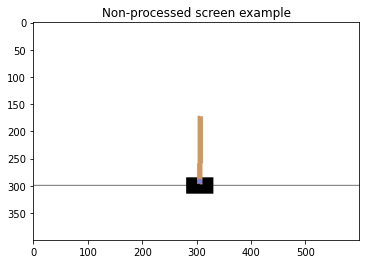

In [9]:
em = CartPoleEnvManager()
em.reset()
screen = em.render('rgb_array')

plt.figure()
plt.imshow(screen)
plt.title('Non-processed screen example')
plt.show()

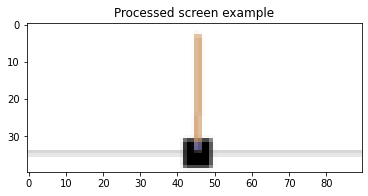

In [10]:
screen = em.get_processed_screen()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Processed screen example')
plt.show()

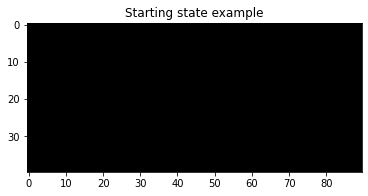

In [11]:
screen = em.get_state()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Starting state example')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


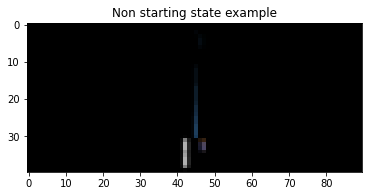

In [12]:
for i in range(5):
    em.take_action(torch.tensor([1]))
screen = em.get_state()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Non starting state example')
plt.show()

### Plotting

In [13]:
def plot(values, moving_avg_period):
    plt.figure(2)
    plt.clf()        
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(values)

    moving_avg = get_moving_average(moving_avg_period, values)
    plt.plot(moving_avg)    
    plt.pause(0.001)
    print("Episode", len(values), "\n", \
        moving_avg_period, "episode moving avg:", moving_avg[-1])
#     if is_ipython: display.clear_output(wait=True)


def get_moving_average(period, values):
    values = torch.tensor(values, dtype=torch.float)
    if len(values) >= period:
        moving_avg = values.unfold(dimension=0, size=period, step=1) \
            .mean(dim=1).flatten(start_dim=0)
        moving_avg = torch.cat((torch.zeros(period-1), moving_avg))
        return moving_avg.numpy()
    else:
        moving_avg = torch.zeros(len(values))
        return moving_avg.numpy()


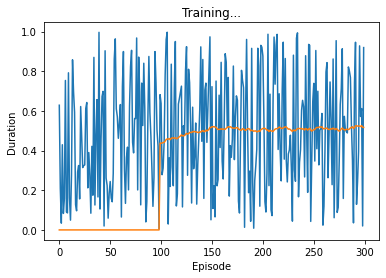

Episode 300 
 100 episode moving avg: 0.5169226


In [14]:
plot(np.random.rand(300), 100)

## Experience Replay
In DQN algorithm, a buffer of past experiences is used to stabalize the training by decorrelating the training examples with each batch used toupdate the neural network. This buffer records the last states, rewards, next state observed.
It stores the agents experiences at each time-step, pooled over many episodes. The replay memory stores only Last N experience tuples, and samples uniformly at random from D when performing updates. This approach is in some respects limited since the memory buffer does not differentiate important transitions and always overwrites with recent transitions due to the finite memory size N. the uniform sampling gives equal importance to all transitions in the replay memory.
> **Reason** : the experience replay is important because successive states are highly correlated/similar (strong correlation bw samples). This means that there is a significant risk that the network will completely forget about what it’s like to be in state it hasn’t seen in a while. Replaying experience prevents this by still showing old frames to the network. Randomizing the samples breaks these correlations and reduces the variance in the updates. 
> Note: when learning by experience replay, it is necessary to learn off-policy
(because our current parameters are different to those used to generate the sample), which motivates the choice of Q-learning. 
> Note: experience replay requires a lot of memory.

- Implementation: We run an inner loop within the RL algorithm which randomly selects a minibatch from the samples of experiences stored

### Pseudo code for Deep-Q-Learning with experience Replay
- Initialize replay memory *D* to capacity *N*
- Initialize action-value function *Q* with random weights
- for episode = 1,M *do*
    * Initialize sequence $s_1 = {(x_1)}$ and preprocessed sequenced $\phi_1 = \phi(s1)$ 
    * for t=1,T *do*
      * With probability $\epsilon$ select a random action $a_t$
      * otherwise select $a_t = max_a*Q(\phi(s_t),a;\theta)$
      * execute action $a_t$ in the emulator and observe reward $r_t$ and image $x_{t+1}$
      * Set $S_{t+1} = s_t, a_t,x_{t+1}$ and process $\phi_{t+1} = \phi(s_{t+1})$
      * Store transition $(\phi_t, a_t,r_t,\phi_{t+1})$ in D
      * Sample random minibatch of transitions $(\phi_t, a_t,r_t,\phi_{t+1})$ from D
      * Set $y_j = {r_j for\:terminal\: \phi_{j+1}} \:\:OR\:\: {r_J + \gamma*max_a*Q(\phi_{j+1},a;\theta)}$ for non-terminal $\phi_{j+1}$
      * Perform gradient descent step on $(y_j - Q(\phi_j,a_j;\theta))^2$
      end for
end for


> The pre-processed sequenced function :  here means that when we are using the atari gym environment, we reduce the pixel size of image, convert to grayscale etc.
> Terminal and Non Terminal state: If we are in the last stae, and there are no rewards coming in, then it is the last reward we get, whereas if we are not in the last state and we have more rewards coming in then we are definetly looking ahead at more rewards.
> Loss function: $(y_j - Q(\phi_j,a_j;\theta))^2$
this formula basically subtracts the labelled output and the Q(S,a). It takes the squared difference of the same to train the neural network. So here, we have the `replay buffer` and we have already played the game, and we have a reward for the particular action, in that particular state. ``Q-function`` tells us the reward from the current action in the current state, in addition to the sum of rewards till the end of the game. $r_t + \sum_{t+1}^T r_t$

## Exploration
We dont want out model to learn the actions randomly as mentioned before, instead we want it to take the optimal actions. When our network is learning we do not want it to perform randomly. 
- We should sometimes choose the actions randomly and sometimes choose the best actions according to the policy. And this is how we should learn the complexities about the different states

### E-Greedy method:
We define a probability E and with which we choose random actions, otherwise we choose the best/optimal actions with maximum Q-value for that state
- It is common to start with a high ε and to reduce its value as your DQN goes through more iterations. This process is sometimes called “annealing”.Annealing linearly simply means that the value of ε is reduced by a fixed amount at each iteration.

# Implementation with Stable Baselines - 
``Stable BaseLines:a Fork of OpenAI Baselines — Reinforcement Learning Made Easy``\
Stable baselines works on environments that follow the gym inferface. 
- Documentations - [StableBaselines3](https://stable-baselines3.readthedocs.io/en/master/)

In [ ]:
# Stable baselines 
!pip install stable-baselines3[extra]

     |████████████████████████████████| 153kB 2.8MB/s 


In [ ]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install stable-baselines[mpi]==2.10.0

TensorFlow 1.x selected.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.7 [783 kB]
Fetched 783 kB in 2s (375 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.7_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.7) ...
Setting up xvfb (2:1.19.6-1ubuntu4.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 256

In [ ]:
# tensorflow
!pip install tensorflow==1

     |████████████████████████████████| 44.5MB 95kB/s 
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.0.0 which is incompatible.
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [ ]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 48kB/s 
     |████████████████████████████████| 460kB 38.6MB/s 
     |████████████████████████████████| 6.8MB 31.7MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install stable_baselines

### Some things we will need to import here are

In [2]:
import gym
import numpy as np
import pandas as pd 

from stable_baselines import PPO2 ## RL Model
from stable_baselines3 import PPO ## RL Model

from stable_baselines.common.policies import MlpPolicy # policy class used to create the network
from stable_baselines.common.vec_env import DummyVecEnv

from stable_baselines.common.evaluation import evaluate_policy

import stable_baselines3
print(stable_baselines3.__version__)

C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

0.8.0


## Setting up CartPole examples:
- "A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "
- We chose the `MlpPolicy` because input of CartPole is a feature vector, not images.

In [6]:
# environemnt
env = gym.make('CartPole-v1')

# selecting policy
model = PPO('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [7]:
def evaluation_function(model, num_episodes):

    all_episodes=[]

    for i in range(num_episodes):
        episodes_rewards = []
        done=False
        obs = env.reset()

        while not done:
            action,_states = model.predict(obs)
            # action = env.action_space.sample()
            obs,reward,done,info = env.step(action)
            
            episodes_rewards.append(reward)

        all_episodes.append(sum(episodes_rewards))

    mean_episode_reward = np.mean(all_episodes)
    print("Mean reward :", mean_episode_reward, "Num episodes:", num_episodes)
    
    return mean_episode_reward

In [8]:
mean_reward, standard_reward = evaluate_policy(model,env, n_eval_episodes= 1000)

print("mean reward : ",mean_reward,", Standard reward :", standard_reward)

mean reward :  120.272 , Standard reward : 37.844180741561836


In [9]:
# training the agent for some timesteps
model.learn(total_timesteps=10000)

#evaulating
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print("mean reward : ",mean_reward,", Standard reward :", standard_reward)

-----------------------------
| time/              |      |
|    fps             | 1988 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1284        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009860361 |
|    clip_fraction        | 0.0312      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -3.65e+03   |
|    learning_rate        | 0.0003      |
|    loss                 | 6.28        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 54.4        |
-----------------------------------------
----------------------------------

> The mean reward increases to arounf 500 by training the model over multiple timesteps!!

## Training on DQN

In [21]:
# Same as before we instantiate the agent along with the environment
from stable_baselines import DQN

# Deactivate all the DQN extensions to have the original version
# In practice, it is recommend to have them activated
kwargs = {'double_q': False, 'prioritized_replay': False, 'policy_kwargs': dict(dueling=False)}

# Note that the MlpPolicy of DQN is different from the one of PPO
# but stable-baselines handles that automatically if you pass a string
dqn_model = DQN('MlpPolicy', 'CartPole-v1', verbose=1, **kwargs)

Creating environment from the given name, wrapped in a DummyVecEnv.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.


Exception ignored in: <function VecVideoRecorder.__del__ at 0x0000022B6FD43D38>
Traceback (most recent call last):
  File "C:\Users\Abhishek\Anaconda3\lib\site-packages\stable_baselines3\common\vec_env\vec_video_recorder.py", line 108, in __del__
    self.close()
  File "C:\Users\Abhishek\Anaconda3\lib\site-packages\stable_baselines3\common\vec_env\vec_video_recorder.py", line 104, in close
    VecEnvWrapper.close(self)
  File "C:\Users\Abhishek\Anaconda3\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py", line 272, in close
    return self.venv.close()
  File "C:\Users\Abhishek\Anaconda3\lib\site-packages\stable_baselines3\common\vec_env\dummy_vec_env.py", line 65, in close
    env.close()
  File "c:\users\abhishek\gym\gym\core.py", line 243, in close
    return self.env.close()
  File "c:\users\abhishek\gym\gym\envs\classic_control\cartpole.py", line 217, in close
    self.viewer.close()
  File "c:\users\abhishek\gym\gym\envs\classic_control\rendering.py", line 83, i

Instructions for updating:
Use tf.cast instead.


In [22]:
def evaluate(model, num_episodes=100):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    # This function will only work for a single Environment
    env = model.get_env()
    all_episode_rewards = []
    for i in range(num_episodes):
        episode_rewards = []
        done = False
        obs = env.reset()
        while not done:
            # _states are only useful when using LSTM policies
            action, _states = model.predict(obs)
            # here, action, rewards and dones are arrays
            # because we are using vectorized env
            obs, reward, done, info = env.step(action)
            episode_rewards.append(reward)

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    print("Mean reward:", mean_episode_reward, "Num episodes:", num_episodes)

    return mean_episode_reward

# Random Agent, before training
mean_reward_before_train = evaluate(dqn_model, num_episodes=100)

Mean reward: 13.49 Num episodes: 100


In [23]:
dqn_model.learn(total_timesteps=10000, log_interval=10)

--------------------------------------
| % time spent exploring  | 74       |
| episodes                | 10       |
| mean 100 episode reward | 28.9     |
| steps                   | 260      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 55       |
| episodes                | 20       |
| mean 100 episode reward | 23.8     |
| steps                   | 452      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 42       |
| episodes                | 30       |
| mean 100 episode reward | 20.4     |
| steps                   | 591      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 24       |
| episodes                | 40       |
| mean 100 episode reward | 19.8     |
| steps                   | 771      |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [24]:
# Evaluate the trained agent
mean_reward = evaluate(dqn_model, num_episodes=100)

Mean reward: 192.7 Num episodes: 100


### DQN + Prioritized replay

In [25]:
# DQN + Prioritized replay
kwargs = {'double_q': False, 'prioritized_replay': True, 'policy_kwargs': dict(dueling=False)}

dqn_per_model = DQN('MlpPolicy', 'CartPole-v1', verbose=1, **kwargs)

Creating environment from the given name, wrapped in a DummyVecEnv.


In [26]:
dqn_per_model.learn(total_timesteps=10000, log_interval=10)

--------------------------------------
| % time spent exploring  | 84       |
| episodes                | 10       |
| mean 100 episode reward | 17.3     |
| steps                   | 156      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 67       |
| episodes                | 20       |
| mean 100 episode reward | 17.7     |
| steps                   | 336      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 54       |
| episodes                | 30       |
| mean 100 episode reward | 15.9     |
| steps                   | 461      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 43       |
| episodes                | 40       |
| mean 100 episode reward | 14.7     |
| steps                   | 574      |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 370      |
| mean 100 episode reward | 67.4     |
| steps                   | 9613     |
--------------------------------------


In [27]:
# Evaluate the trained agent
mean_reward = evaluate(dqn_per_model, num_episodes=100)

Mean reward: 182.8 Num episodes: 100


##  record video

In [16]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

In [13]:
# Un-comment the 2 steps bellow, before going ahead

# conda install -c conda-forge ffmpeg    ## --> run on the command line

# pip install ffmpeg-python


In [14]:
# cartpole model
record_video('CartPole-v1', model, video_length=500, prefix='ppo2-cartpole')

Saving video to  C:\Users\Abhishek\Desktop\ADS\Assignments\Mini Project 1\Reinforcement Learning\videos\ppo2-cartpole-step-0-to-step-500.mp4


In [17]:

show_videos('videos', prefix='ppo2')

In [30]:
record_video('CartPole-v1', dqn_per_model, video_length=1000, prefix='dqn-cartpole')

Saving video to  C:\Users\Abhishek\Desktop\ADS\Assignments\Mini Project 1\Reinforcement Learning\videos\dqn-cartpole-step-0-to-step-1000.mp4


In [31]:
show_videos('videos', prefix='dqn')

## Hyperparameter tuning

In [5]:
import gym
from stable_baselines3 import A2C, SAC, PPO, TD3

gym_env = gym.make('CartPole-v0')

In [13]:
default_model = PPO('MlpPolicy', 'CartPole-v0', 
                    verbose=1, seed=0, batch_size=64, 
                    policy_kwargs=dict(net_arch=[64, 64])).learn(8000)

Using cpu device
Creating environment from the given name 'CartPole-v0'
Wrapping the env in a DummyVecEnv.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 21.1        |
|    ep_rew_mean          | 21.1        |
| time/                   |             |
|    fps                  | 2336        |
|    iterations           | 1           |
|    time_elapsed         | 0           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.027365485 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | -22.3       |
|    learning_rate        | 0.0003      |
|    loss                 | 25.4        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.000151   |
|    value_loss           | 67.5        |
-----------------------------------------
-----------

In [8]:
mean_reward, std_reward = evaluate_policy(default_model, gym_env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:199.87 +/- 1.29


In [9]:
tuned_model = PPO('MlpPolicy', 'CartPole-v0', 
                  batch_size=256, verbose=1, policy_kwargs=dict(net_arch=[256, 256]), seed=0).learn(8000)

Using cpu device
Creating environment from the given name 'CartPole-v0'
Wrapping the env in a DummyVecEnv.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 22.7        |
|    ep_rew_mean          | 22.7        |
| time/                   |             |
|    fps                  | 1951        |
|    iterations           | 1           |
|    time_elapsed         | 1           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.017908307 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | -3.28       |
|    learning_rate        | 0.0003      |
|    loss                 | 32.7        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0028     |
|    value_loss           | 67.2        |
-----------------------------------------
-----------

In [11]:
mean_reward, std_reward = evaluate_policy(tuned_model, gym_env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:200.00 +/- 0.00


Stable Baselines ZOO repository

In [33]:
!git clone https://github.com/araffin/rl-baselines-zoo

Cloning into 'rl-baselines-zoo'...

Updating files:  35% (119/333)

Updating files:  36% (120/333)

Updating files:  37% (124/333)

Updating files:  38% (127/333)

Updating files:  39% (130/333)

Updating files:  40% (134/333)

Updating files:  41% (137/333)

Updating files:  42% (140/333)

Updating files:  43% (144/333)

Updating files:  44% (147/333)

Updating files:  45% (150/333)

Updating files:  46% (154/333)

Updating files:  47% (157/333)

Updating files:  48% (160/333)

Updating files:  49% (164/333)

Updating files:  49% (166/333)

Updating files:  50% (167/333)

Updating files:  51% (170/333)

Updating files:  52% (174/333)

Updating files:  53% (177/333)

Updating files:  54% (180/333)

Updating files:  55% (184/333)

Updating files:  56% (187/333)

Updating files:  57% (190/333)

Updating files:  58% (194/333)

Updating files:  59% (197/333)

Updating files:  60% (200/333)

Updating files:  61% (204/333)

Updating files:  62% (207/333)

Updating files:  63% (210/333)

Upda

In [35]:
cd rl-baselines-zoo/

C:\Users\Abhishek\Desktop\ADS\Assignments\Mini Project 1\Reinforcement Learning\rl-baselines-zoo


In [36]:
!python train.py --algo a2c --env CartPole-v1 --n-timesteps 100000

Traceback (most recent call last):
  File "train.py", line 36, in <module>
    from utils.hyperparams_opt import hyperparam_optimization
  File "C:\Users\Abhishek\Desktop\ADS\Assignments\Mini Project 1\Reinforcement Learning\rl-baselines-zoo\utils\hyperparams_opt.py", line 2, in <module>
    import optuna
ModuleNotFoundError: No module named 'optuna'


In [37]:
!python enjoy.py --algo a2c --env CartPole-v1 --no-render --n-timesteps 5000 --folder logs/

Traceback (most recent call last):
  File "enjoy.py", line 182, in <module>
    main()
  File "enjoy.py", line 75, in main
    assert os.path.isdir(log_path), "The {} folder was not found".format(log_path)
AssertionError: The logs/a2c folder was not found


>> Optuna for optimizing the hyperparameters.

In [38]:
!python -m train.py --algo ppo2 --env MountainCar-v0 -n 50000 -optimize --n-trials 1000 --n-jobs 2 --sampler tpe --pruner median

Traceback (most recent call last):
  File "C:\Users\Abhishek\Anaconda3\lib\runpy.py", line 183, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "C:\Users\Abhishek\Anaconda3\lib\runpy.py", line 109, in _get_module_details
    __import__(pkg_name)
  File "C:\Users\Abhishek\Desktop\ADS\Assignments\Mini Project 1\Reinforcement Learning\rl-baselines-zoo\train.py", line 36, in <module>
    from utils.hyperparams_opt import hyperparam_optimization
  File "C:\Users\Abhishek\Desktop\ADS\Assignments\Mini Project 1\Reinforcement Learning\rl-baselines-zoo\utils\hyperparams_opt.py", line 2, in <module>
    import optuna
ModuleNotFoundError: No module named 'optuna'


In [39]:
# Set up display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [40]:
!python -m utils.record_video --algo a2c --env CartPole-v1 --exp-id 0 -f logs/ -n 1000

Loading latest experiment, id=0


C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abhishek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

In [43]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [44]:
show_videos(prefix='a2c')

- Train the agent and save it!!

In [ ]:
# save the model
model.save("cartpole_model_save")

# del.model ## -> to remove the model 

# load the model again
model = DQN.load("cartpole_model_save")

## Using Keras-RL Library

In [ ]:
!pip install rl

In [ ]:
!pip install keras-rl

In [ ]:
!pip install tensorflow==1

     |████████████████████████████████| 44.5MB 89kB/s 
  Found existing installation: tensorflow 2.3.1
    Uninstalling tensorflow-2.3.1:
      Successfully uninstalled tensorflow-2.3.1


In [ ]:
!pip install tensorflow==2

     |████████████████████████████████| 86.3MB 90kB/s 
     |████████████████████████████████| 450kB 44.4MB/s 
     |████████████████████████████████| 3.8MB 36.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=d6591fc40b32fffa6ed625a930d1bb3b8011f58abc5a8ec685a1e532ae9d0705
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: t

In [ ]:
!pip install h5py

In [ ]:
# for atari environment
# !pip install Pillow

In [14]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from gym.wrappers.monitoring.video_recorder import VideoRecorder 

In [2]:
ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [8]:
n_actions = env.action_space.n
n_states = env.observation_space.shape

# Actions are left, up, right, down
print(f'Number of actions {n_actions} for the "{env.unwrapped.spec.id}" enviroment')
# States are the 16 fields
print(f'Number of possible states {n_states} for the "{env.unwrapped.spec.id}" enviroment')

Number of actions 2 for the "CartPole-v0" enviroment
Number of possible states (4,) for the "CartPole-v0" enviroment


In [9]:
#  build a simple model
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_7 (Activation)    (None, 16)               

In [11]:
# configure and compile our agent

memory = SequentialMemory(limit=5000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])


In [16]:

dqn.fit(env, nb_steps=2500, visualize=True, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# record video
rec = VideoRecorder(env)    
rec.capture_frame()  

# Finally, evaluate our algorithm for 5 episodes.
dqn.test( env,nb_episodes=5, visualize=True)

#recording close
rec.close() 

Training for 2500 steps ...
  200/2500: episode: 1, duration: 4.073s, episode steps: 200, steps per second: 49, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.055 [-1.088, 0.944], loss: 8.392529, mae: 31.677299, mean_q: 63.262377
  400/2500: episode: 2, duration: 3.449s, episode steps: 200, steps per second: 58, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.294 [-2.011, 0.905], loss: 6.395052, mae: 31.891396, mean_q: 63.793247
  600/2500: episode: 3, duration: 3.588s, episode steps: 200, steps per second: 56, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.026 [-0.861, 0.965], loss: 9.439447, mae: 32.131977, mean_q: 64.111565
  800/2500: episode: 4, duration: 3.627s, episode steps: 200, steps per second: 55, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.4

# TF Agents - TensorFlow library for Contextual Bandits and Reinforcement Learning.

In [ ]:
# pip install tensorflow --update

In [17]:
# import base64
# import IPython
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
# import tf_agents

In [ ]:
env = tf_agents.environments.suite_gym.load('CartPole-v1')
env = tf_agents.environments.tf_py_environment.TFPyEnvironment(env)

In [ ]:
q_net = tf_agents.networks.q_network.QNetwork(env.observation_spec(), env.action_spec())
train_step_counter = tf.Variable(0)

agent = tf_agents.agents.dqn.dqn_agent.DqnAgent(env.time_step_spec(),
                                                env.action_spec(),
                                                q_network=q_net,
                                                optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.001),
                                                td_errors_loss_fn=tf_agents.utils.common.element_wise_squared_loss,
                                                train_step_counter=train_step_counter)

agent.initialize()

replay_buffer = tf_agents.replay_buffers.tf_uniform_replay_buffer.TFUniformReplayBuffer(data_spec=agent.collect_data_spec,
                                                                                        batch_size=env.batch_size,
                                                                                        max_length=100000)

In [ ]:
def compute_avg_return(environment, policy, num_episodes=10):
    total_return = 0.0
    for _ in range(num_episodes):

        time_step = environment.reset()
        episode_return = 0.0

        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return

    avg_return = total_return / num_episodes
    return avg_return.numpy()[0]

def collect_step(environment, policy, buffer):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    next_time_step = environment.step(action_step.action)
    traj = tf_agents.trajectories.trajectory.from_transition(time_step, action_step, next_time_step)

    # Add trajectory to the replay buffer
    buffer.add_batch(traj)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(env, agent.policy, 5)
returns = [avg_return]

In [ ]:
collect_steps_per_iteration = 1
batch_size = 64
dataset = replay_buffer.as_dataset(num_parallel_calls=3, 
                                    sample_batch_size=batch_size, 
                                    num_steps=2).prefetch(3)
iterator = iter(dataset)
num_iterations = 10000
env.reset()

for _ in range(batch_size):
    collect_step(env, agent.policy, replay_buffer)

for _ in range(num_iterations):
    # Collect a few steps using collect_policy and save to the replay buffer.
    for _ in range(collect_steps_per_iteration):
        collect_step(env, agent.collect_policy, replay_buffer)

    # Sample a batch of data from the buffer and update the agent's network.
    experience, unused_info = next(iterator)
    train_loss = agent.train(experience).loss

    step = agent.train_step_counter.numpy()

    # Print loss every 200 steps.
    if step % 200 == 0:
        print('step = {0}: loss = {1}'.format(step, train_loss))

    # Evaluate agent's performance every 1000 steps.
    if step % 1000 == 0:
        avg_return = compute_avg_return(env, agent.policy, 5)
        print('step = {0}: Average Return = {1}'.format(step, avg_return))
        returns.append(avg_return)

In [ ]:
plt.figure(figsize=(12,8))
iterations = range(0, num_iterations + 1, 1000)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.show()

## Some things to be added 
1. why Q loss does not converge in deep q learning algorithm?
A reinforcement learning algorithm is considered to converge when the learning curve gets flat and no longer increases. The difference between expected Q value and current Q value. Only when loss value converges, the current approaches optimal Q value. If it diverges, this means your approximation value is less and less accurate. 
2. Prioritized Experience Replay and Double Q-Learning
3. Metric and plots for evaulation

# Conclusion
We implemented RL on Open gym AI environment in this notebook. This gives us a good idea about the basic implementation of different Reinforcement learning algorithms along with their implementation. We learn about the pseudo code for Qlearning and DQN. We see the implementation with different libraries for RL such as Stable baselines, Keras-RL.
> Understanding the bias-variance tradeoff:
We want our model to be complex, as we want it to solve the complicated problems like predicting a cars trajectory. At the same time we would also not want a model that needs too many samples, as there are some limitations to compute power and limited memory access etc. Extremely complex model would require alot of samples to be trained on, just like we saw above by training the neural network. By adding a new layer the complexity of the model just grows exponentially. 
**Hence** increasing model complexity also required increasing the sample complexity for the training process, and vice-versa

<img src="Images/complexity.png">

# Resources:
1. [Playing Atari with Deep Reinforcement Learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)
2. [Video explainattion of the paper](https://www.youtube.com/watch?v=rFwQDDbYTm4&ab_channel=YannicKilcher)
1. [Stable_baselines](https://araffin.github.io/slides/rl-tuto-jnrr19/#/4)
1. [Frame Skipping and Pre-Processing for Deep Q-Networks on Atari 2600 Games](https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/)
1. [Q and DQN learning](https://www.digitalocean.com/community/tutorials/how-to-build-atari-bot-with-openai-gym)